<a href="https://colab.research.google.com/github/raimadb/M.Tech/blob/main/Appendix_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 1.  0.  0.  0.  0.]
 [ 2. -5.  4. -1.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0. -1.  4. -5.  2.]
 [ 0.  0.  1. -4.  3.]]
[[ 0.    ]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [ 0.    ]]
[[0.     ]
 [0.21875]
 [0.375  ]
 [0.46875]
 [0.5    ]]
[[ 1.    0.    0.    0.    0.  ]
 [ 1.85 -4.55  3.55 -0.85  0.  ]
 [ 0.1   0.6  -1.4   0.6   0.1 ]
 [ 0.   -0.85  3.55 -4.55  1.85]
 [ 0.    0.    0.7  -3.4   2.7 ]]
[[ 0.    ]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [ 0.    ]]
[[-6.00120554e-17]
 [ 2.09375000e-01]
 [ 3.56250000e-01]
 [ 4.40625000e-01]
 [ 4.62500000e-01]]


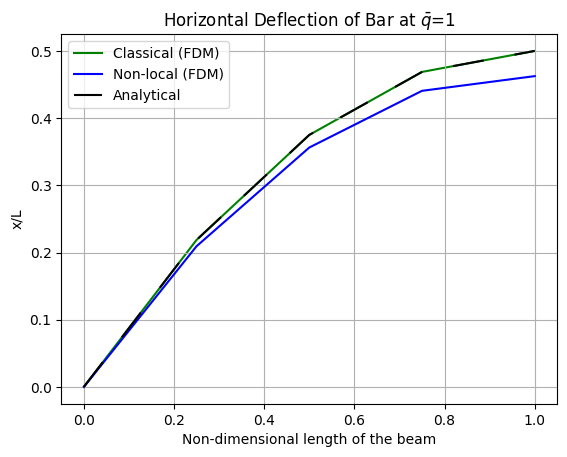

In [ ]:
#Appendix A1


from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import csv


#q_bar=(q*L)/(A*E)

m=5         #(0 to (m-1))
h_bar=1/(m-1)

q_bar=1



def solve_equation(alfa,beta):
  A=np.zeros([m,m])
  A[0,0]=1
  A[1,0]=2*alfa+(5/2)*beta
  A[1,1]=-(5*alfa+(11/2)*beta)
  A[1,2]=4*alfa+(7/2)*beta
  A[1,3]=-(alfa+beta/2)
  for i in range(2,m-2):
    A[i,i-2]=beta
    A[i,i-1]=alfa-2*beta
    A[i,i]=-2*alfa+2*beta
    A[i,i+1]=alfa-2*beta
    A[i,i+2]=beta


  A[m-2,m-4]=-(alfa+beta/2)
  A[m-2,m-3]=4*alfa+(7/2)*beta
  A[m-2,m-2]=-(5*alfa+(11/2)*beta)
  A[m-2,m-1]=2*alfa+(5/2)*beta


  A[m-1,m-3]=alfa-beta
  A[m-1,m-2]=-(4*alfa+2*beta)
  A[m-1,m-1]=3*alfa+3*beta


  B=np.zeros([m,1])


  B[0,0]=0


  for i in range(1,m-1):
   B[i,0]=-q_bar*(h_bar**2)

  B[m-1,0]=0

  X=linalg.solve(A,B)
  print(A)
  print(B)
  print(X)


  return X

# Solve using FDM for both classical and non-local cases
X1 = solve_equation(alfa=1, beta=0)
X2 = solve_equation(alfa=0.8, beta=0.1)

# Analytical solution
x = np.linspace(0, 1, m)
X3 = (q_bar*x) - (q_bar*(x**2)/2)


#table
combined_results = list(zip(X1, X2, X3))
csv_file_path = 'Axial displacement of a bar,a=0.8,n=5.csv'
with open(csv_file_path, mode='w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Classical (FDM)', 'Non-local (FDM)','Classical (Analytical Method)'])
    csv_writer.writerows(combined_results)


# Plot the results
plt.figure()
plt.plot(x,X1, color='green',linewidth=1.5,zorder=1, label='Classical (FDM)')
plt.plot(x,X2, color='blue', linewidth=1.5,zorder=2, label='Non-local (FDM)')
plt.plot(x,X3, color='black', linewidth=1.5,dashes=(15,15),zorder=3, label='Analytical')
plt.xlabel('Non-dimensional length of the beam')
plt.ylabel('x/L')
plt.title(r'Horizontal Deflection of Bar at $\bar{q}$=1')
plt.grid()
plt.legend()
plt.savefig("q_bar=1.pdf")
plt.show()


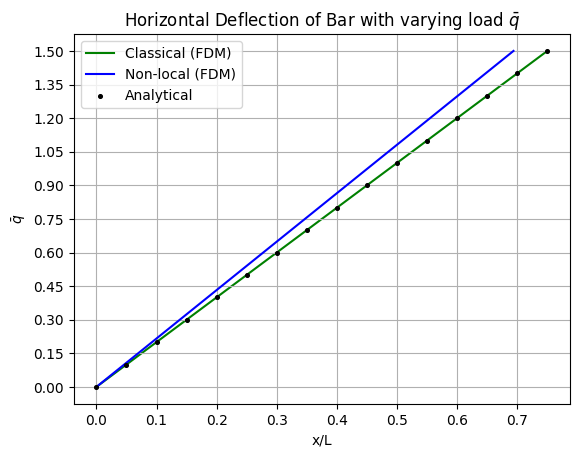

In [ ]:
#Appendix A2


from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import csv




m=5         #(0 to (m-1))
h_bar=1/(m-1)

q_bar_values=np.round(np.arange(0,1.501,0.1),2)

classical_results =[]
non_local_results =[]
analytical_results=[]

def solve_equation(alfa,beta):
  A=np.zeros([m,m])
  A[0,0]=1
  A[1,0]=2*alfa+(5/2)*beta
  A[1,1]=-(5*alfa+(11/2)*beta)
  A[1,2]=4*alfa+(7/2)*beta
  A[1,3]=-(alfa+beta/2)
  for i in range(2,m-2):
    A[i,i-2]=beta
    A[i,i-1]=alfa-2*beta
    A[i,i]=-2*alfa+2*beta
    A[i,i+1]=alfa-2*beta
    A[i,i+2]=beta


  A[m-2,m-4]=-(alfa+beta/2)
  A[m-2,m-3]=4*alfa+(7/2)*beta
  A[m-2,m-2]=-(5*alfa+(11/2)*beta)
  A[m-2,m-1]=2*alfa+(5/2)*beta


  A[m-1,m-3]=alfa-beta
  A[m-1,m-2]=-(4*alfa+2*beta)
  A[m-1,m-1]=3*alfa+3*beta


  B=np.zeros([m,1])


  B[0,0]=0


  for i in range(1,m-1):
   B[i,0]=-q_bar*(h_bar**2)

  B[m-1,0]=0

  X=linalg.solve(A,B)



  return X

for q_bar in q_bar_values:
  X1 = solve_equation(alfa=1, beta=0)
  X2 = solve_equation(alfa=0.8, beta=0.1)

  x = np.linspace(0, 1, m)
  X3 = (q_bar*x) - (q_bar*(x**2)/2)

  classical_results.append(X1[-1])
  non_local_results.append(X2[-1])
  analytical_results.append(X3[-1])

#table
combined_results = list(zip(q_bar_values,classical_results,non_local_results, analytical_results))
csv_file_path = 'Axial displacement of a bar with varying q_bar,a=0.8,n=5.csv'
with open(csv_file_path, mode='w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['q_bar','Classical (FDM)', 'Non-local (FDM)','Classical (Analytical Method)'])
    csv_writer.writerows(combined_results)


y=np.linspace(0,1.5,11)
# Plot the results
plt.figure()
plt.yticks(y)
plt.plot(classical_results,q_bar_values, color='green',linewidth=1.5,zorder=1, label='Classical (FDM)')
plt.plot(non_local_results,q_bar_values, color='blue', linewidth=1.5,zorder=2, label='Non-local (FDM)')
plt.scatter(analytical_results,q_bar_values, color='black', s=7,zorder=3, label='Analytical')
plt.xlabel('x/L')
plt.ylabel(r'$\bar{q}$')
plt.title(r'Horizontal Deflection of Bar with varying load $\bar{q}$')
plt.grid()
plt.legend()
plt.savefig("Bar_with_varying_q_bar.pdf")
plt.show()
